# Data Science Project: Digital Media Consumption & Sharing
Miles McCain

CSC630 — Machine Learning (Fall 2018)

---

Published on the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), the [Online News Popularity](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) dataset provides a sample of online news articles' attributes and metadata (words in the title, number of 'positive' words in the title, day of the week that the article is published, etc) and popularity (as indicated by the total number of times that the article is 'shared' on social media). The articles were collected from Mashable over a period of two years between 2013 and 2015. The dataset is cited below.

> K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.

### Features

The dataset has sixty features and one response (number of shares). Two of its features (`url`, the article's url, and `timedelta`, the time between the article being published and the original authors pulling it into their dataset) are non-predictive.

Conveniently, the dataset authors have already engineered a number of useful features to aid analysis. These features include `n_tokens_title` (the total number of words in the title of the article), `n_tokens_content` (the total number of words in the body of the article), `n_non_stop_words` (the 'rate' of non-stop words in the article text), `num_videos` (the number of videos in the article), channel data (which channels—for example, tech, world, business, lifestyle, etc—was the article published under), time features such as `is_weekend` (was the article published on the weekend), and dozens of other features.

*For a complete list and explanation of the dataset's figures and response, as described by the dataset authors themselves, see the Appendix.* **TODO**

### Response

The response of the dataset is `shares`, which denotes the number of times that the article was shared on social media at the time that the authors pulled the article into their dataset. 

### Samples
The dataset contains 39,644 samples. There is no missing data.

### Models
[[summarize models]]

### Results
[[summarize results]]

### TODO
* Make ' and " consistent

---

With the summary out of the way, let's begin!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import zipfile
from io import StringIO
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)

/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_boo

## Loading the data

At this early stage in the project, I'm going to load and save the data directly from its source. This will keep everything transparent for the time being. In the final submission, I'll clean this up.

I referred to [this](https://stackoverflow.com/questions/7243750/download-file-from-web-in-python-3) StackOverflow response.

In [2]:
urllib.request.urlretrieve("http://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip", "/tmp/OnlineNewsPopularity.zip")
zipped_file = zipfile.ZipFile("/tmp/OnlineNewsPopularity.zip", "r")
zipped_file.extractall("/tmp/")
zipped_file.close()

## A First Look

We'll start by loading the data into a DataFrame.

In [4]:
df = pd.read_csv("/tmp/OnlineNewsPopularity/OnlineNewsPopularity.csv")

Now, let's take a first look at the data!

In [5]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


This is helpful. Now, let's look at various statistics about the data.

## Data Cleaning

Generally, this is a very mature dataset. The authors already did much of our work for us—for example, they already performed 'one-hotting' on all the categorical features. It looks like some of the column names are prepended with spaces, so let's remove those before moving forward.

In [6]:
df.rename(columns={column: column.strip() for column in df.columns}, inplace=True)

Let's also drop the columns that, for transparency purposes, we won't use in our analysis. After all, if we can't explain what it means, we shouldn't be using it in our predictions!

In [7]:
df.drop(['url', 'timedelta', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'], axis=1, inplace=True)

With that done, let's look for missing values or suspicious samples that we should omit.

In [8]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,660.000000,

**TODO**: comprehensive missing values check

## Preliminary Analysis & Feature Engineering

Now that we have cleaned our data, let's take a closer look at what we're working with.

### The Target: Shares

Why don't we start by examining our target, `shares`.

/home/miles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/miles/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


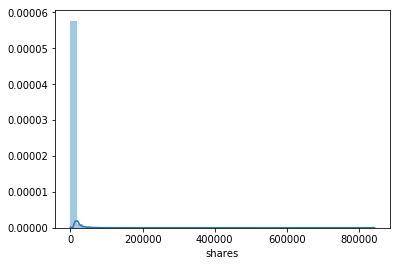

In [9]:
sns.distplot(df['shares'])

Wow, that's quite the range. Some articles receive barely any shares, and others receive nearly 100,000. This might throw our models off. After all, `843300` shares is quite the outlier.

We might consider instead trying to predict the _logarithm_ of the shares. That way, our data will be slightly more compact—and less confusing for the models. (Keep in mind that this is only partly my own idea; I read someone suggest online that taking the logarithm of a feature/target with a wide range can help to reduce the effect of outliers and generally just makes everything a bit more compact.)

/home/miles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/miles/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


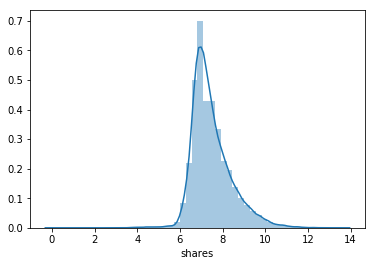

In [10]:
sns.distplot(np.log(df['shares']))

Okay, perfect! That looks a lot better. Let's make it official, so to speak:

In [11]:
df['shares_log'] = np.log(df['shares'])

Now, let's take a look at some correleations before we embark on the rest of our feature engineering. We'll start by looking at the correlations between _all_ of the features. This will help us understand if any features are indicating the same thing, and can therefore be omitted.

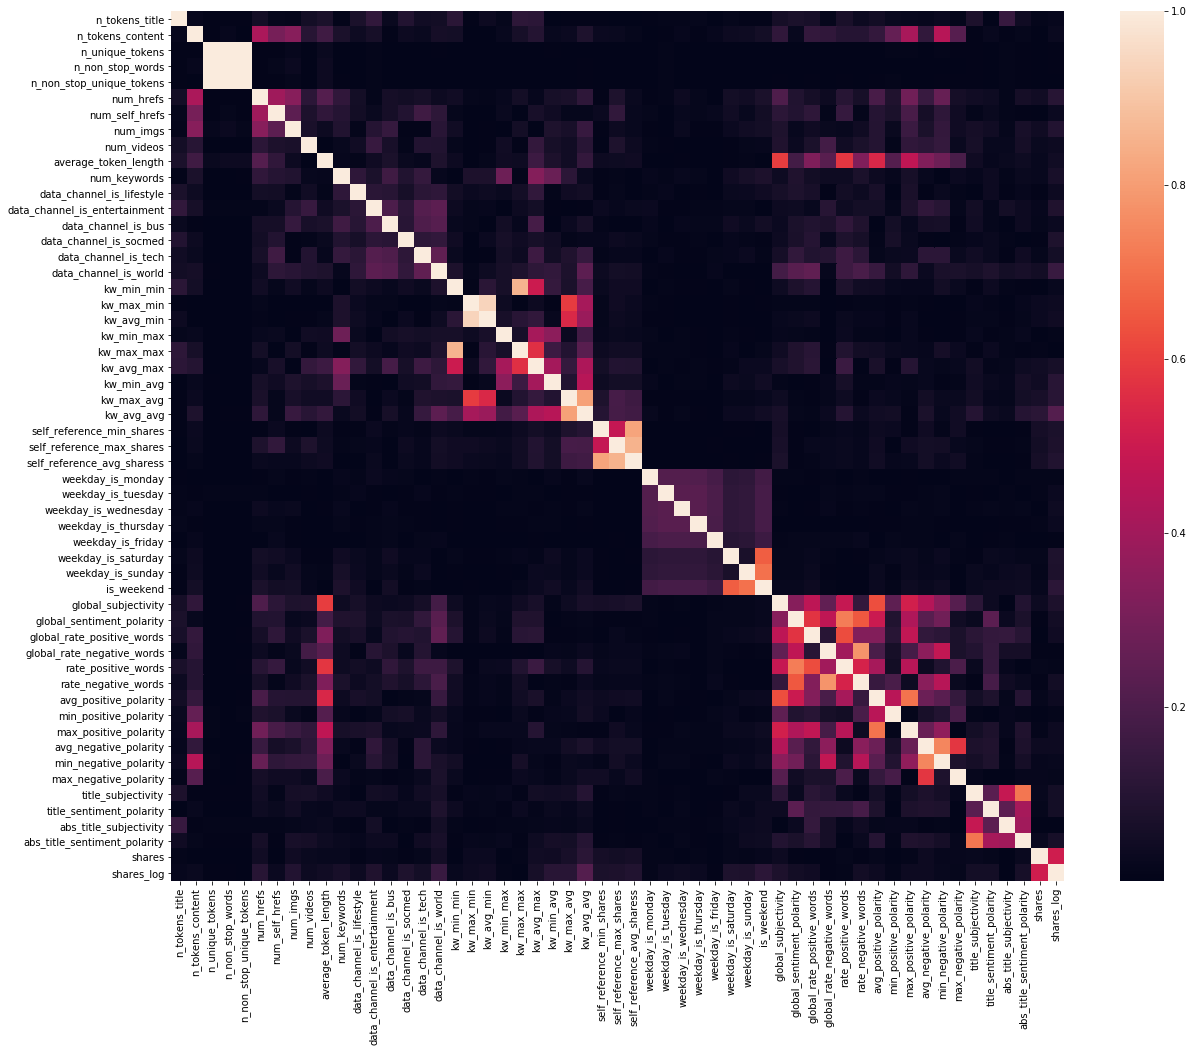

In [12]:
correlation = df.corr().abs()
plt.figure(figsize = (20, 16))
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

That's a helpful visual, and it helps us identify many overlapping features. Notably, it doesn't look like there are any features that really correlate well with `shares` or `shares_log`.

Let's have a look at the features which contain the _most_ shared data (as visualized in the chart above).

In [13]:
# See https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

upper_triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))

highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]

highly_correlated

['n_non_stop_words',
 'n_non_stop_unique_tokens',
 'kw_avg_min',
 'kw_max_max',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'rate_negative_words']

Perfect. Let's drop those columns and look at our updated correlation heatmap!

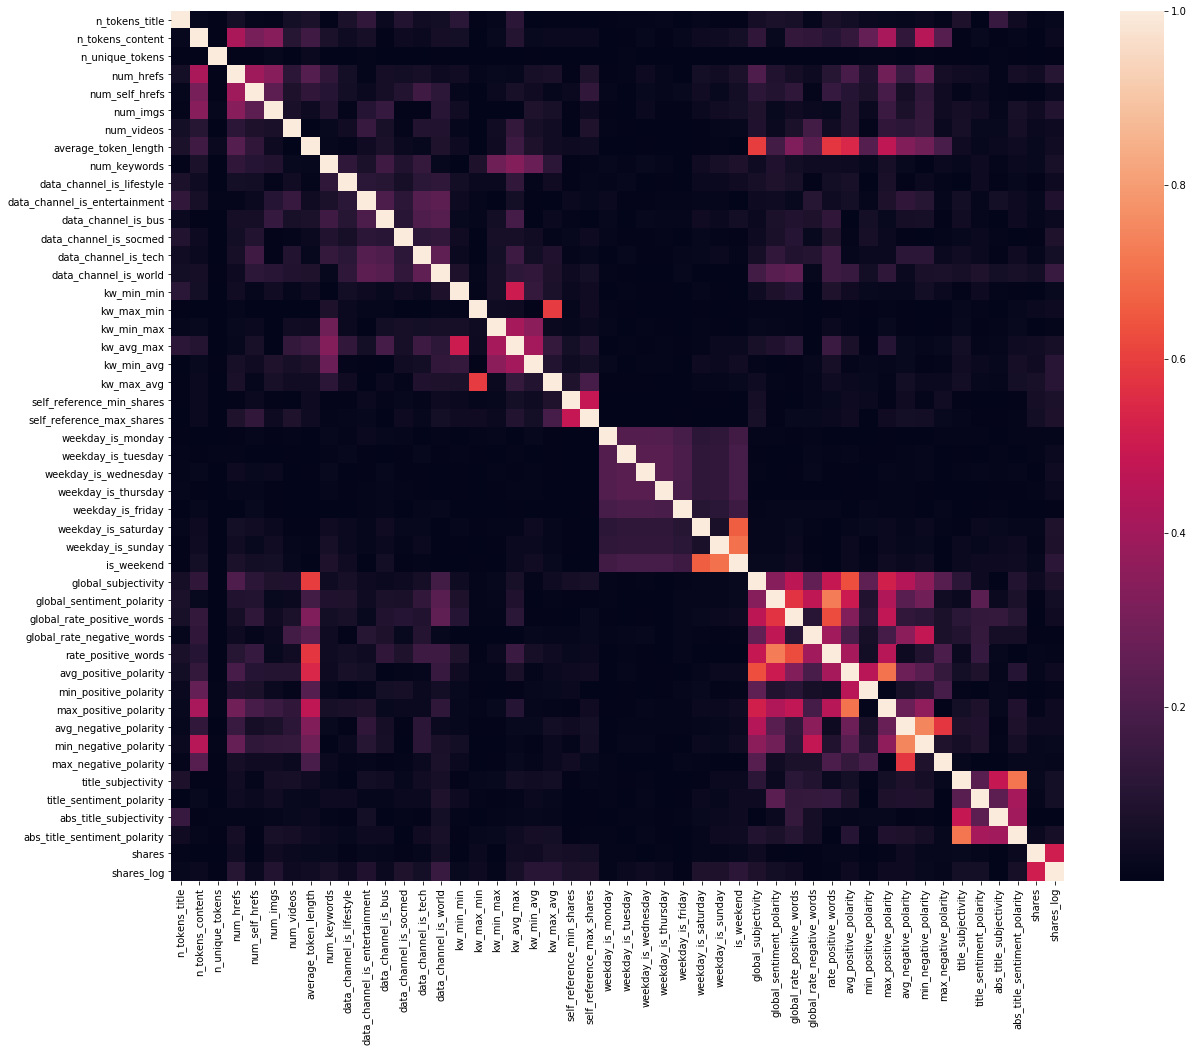

In [14]:
df.drop(highly_correlated, inplace=True, axis=1)
correlation = df.corr().abs()
plt.figure(figsize = (20, 16))
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

### Reducing Spread

Now that we've reduced the data overlap, let's make sure that our data isn't too spread out (and might therefore not lend itself well to fitting). **TODO**

### Finalizing our Features

Now that our data is cleaned and our features are engineered, let's establish the final features and target.

In [15]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negat

In [16]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
           'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
           'num_keywords', 'data_channel_is_lifestyle',
           'data_channel_is_entertainment', 'data_channel_is_bus',
           'data_channel_is_socmed', 'data_channel_is_tech',
           'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
           'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
           'self_reference_max_shares', 'weekday_is_monday', 'weekday_is_tuesday',
           'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
           'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
           'global_subjectivity', 'global_sentiment_polarity',
           'global_rate_positive_words', 'global_rate_negative_words',
           'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
           'max_positive_polarity', 'avg_negative_polarity',
           'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
           'title_sentiment_polarity', 'abs_title_subjectivity',
           'abs_title_sentiment_polarity']
target = ['shares_log']

## Training the Models!

We will try using the following models to fit our data: 

* Linear Regression
* Random Forest Regressor
* Decision Tree
* ...others?

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Test-train split

Because we have so much data, we're going to go with a test-train split of 75%-25% (**TODO** think more about this)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25) # will remove the target column

**TODO** FIX BELOW

### Linear Regression

In [19]:
linear_regression = LinearRegression().fit(X_train, y_train)

Okay, the model is fit. Let's take a look at its r2 accuracy.

In [20]:
r2_score(linear_regression.predict(X_test), y_test)

-8.081502575477387

### Random Forest Regressor

In [21]:
random_forest = RandomForestRegressor().fit(X_train, y_train)

/home/miles/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [22]:
r2_score(random_forest.predict(X_test), y_test)

-2.600591666340696